In [18]:
import pandas as pd

# Load JSON Files into Pandas Dataframe

In [19]:
filename = 'cluster_0-gun_ piers_ law.json'
path = './lda_clustered_json/'+filename
 
with open(path, encoding='utf-8', mode='r') as currentFile:
    df = pd.read_json(currentFile, orient='index')

df.head(3)

,date_download,date_modify,date_publish,description,language,source_domain,maintext,title,url,clusterID,topic_percentage,topic_keywords,filtered_maintext
0,"07/14/2021, 01:00:35","07/14/2021, 01:00:35","06/12/2021, 11:09:15",Neighbors » Forums » General Discussion » Arti...,en,neighbors.denverpost.com,Neighbors » Forums » General Discussion » Arti...,Colorado poll: Majority favor allowing staff t...,http://neighbors.denverpost.com/viewtopic.php?...,0,0.68812,"gun, piers, law, right, school, child, man, sh...",neighbors forums general discussion talk denve...
26,"07/14/2021, 01:00:35","07/14/2021, 01:00:35","06/12/2021, 13:05:38","Despite new laws to combat the problem, a rape...",en,www.theguardian.com,"Despite new laws to combat the problem, a rape...",Student's rape and murder puts India's sexual ...,https://www.theguardian.com/global-development...,0,0.55440,"gun, piers, law, right, school, child, man, sh...",law rape victim justice edt woman india mamata...
227,"08/29/2021, 06:46:10","08/29/2021, 06:46:10","06/18/2018, 02:03:17",MEDFORD (CBS) – A man accused of groping a tee...,en,boston.cbslocal.com,MEDFORD (CBS) – A man accused of groping a tee...,$1 Million Bail Set For Man Accused Of Groping...,http://boston.cbslocal.com/2014/02/14/1-millio...,0,0.80522,"gun, piers, law, right, school, child, man, sh...",medford cbs man teenager school arlington bail...


In [20]:
amount_of_articles = len(df["filtered_maintext"])
print(f"Amount of articles: {amount_of_articles}")
processed_articles = df['filtered_maintext']

Amount of articles: 3776


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfconverter = TfidfVectorizer(lowercase=True, stop_words='english', min_df=0.05 , max_df=0.6)  
tfidf = tfidfconverter.fit_transform(processed_articles)
words = tfidfconverter.get_feature_names()
print(tfidf)

  (0, 473)	0.2758874758350483
  (0, 1174)	0.35016955405420536
  (0, 427)	0.32471321408379283
  (0, 935)	0.30956400665326594
  (0, 211)	0.613319488206099
  (0, 1090)	0.24617132425446375
  (0, 314)	0.22776774586827225
  (0, 444)	0.3337058239205495
  (1, 770)	0.05918492282306338
  (1, 78)	0.06403641796488081
  (1, 356)	0.0547729893301291
  (1, 3)	0.0507032493177126
  (1, 1079)	0.13449626946002557
  (1, 269)	0.06456262943873618
  (1, 194)	0.043936194067324165
  (1, 431)	0.049199694772564896
  (1, 197)	0.051702917325291385
  (1, 1223)	0.06441059394742818
  (1, 854)	0.043085665297617
  (1, 558)	0.0660800323416875
  (1, 1045)	0.05591987807836715
  (1, 425)	0.04929174874059523
  (1, 437)	0.048190215448452256
  (1, 927)	0.05929618023056133
  (1, 1019)	0.08379087552866855
  :	:
  (3775, 950)	0.032076874263717636
  (3775, 1079)	0.033525150648461774
  (3775, 194)	0.03285520552222196
  (3775, 854)	0.03221918553631986
  (3775, 769)	0.03246001313902688
  (3775, 1215)	0.03176628270748022
  (3775, 392)

In [22]:
from sklearn.metrics.pairwise import cosine_distances

cosine_similarity = cosine_distances(tfidf)
cosine_similarity

array([[0.        , 1.        , 1.        , ..., 0.97692243, 1.        ,
        0.96914605],
       [1.        , 0.        , 0.84504744, ..., 0.88606696, 0.90156309,
        0.81847117],
       [1.        , 0.84504744, 0.        , ..., 0.95869741, 0.88066047,
        0.8699832 ],
       ...,
       [0.97692243, 0.88606696, 0.95869741, ..., 0.        , 0.94770866,
        0.71284469],
       [1.        , 0.90156309, 0.88066047, ..., 0.94770866, 0.        ,
        0.91316695],
       [0.96914605, 0.81847117, 0.8699832 , ..., 0.71284469, 0.91316695,
        0.        ]])

In [23]:
from sklearn.cluster import AffinityPropagation

In [24]:
'''
clustering = AffinityPropagation(convergence_iter=5, affinity='precomputed', random_state=10)
clustering.fit(cosine_similarity)
labels = clustering.labels_
print(labels.dtype)
#cluster_centers = clustering.cluster_centers_
cluster_centers_indices = clustering.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
print(n_clusters_)'''

"\nclustering = AffinityPropagation(convergence_iter=5, affinity='precomputed', random_state=10)\nclustering.fit(cosine_similarity)\nlabels = clustering.labels_\nprint(labels.dtype)\n#cluster_centers = clustering.cluster_centers_\ncluster_centers_indices = clustering.cluster_centers_indices_\nn_clusters_ = len(cluster_centers_indices)\nprint(n_clusters_)"

In [25]:
'''
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = cosine_similarity[cluster_centers_indices[k]]
    plt.plot(cosine_similarity[class_members, 0], cosine_similarity[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in cosine_similarity[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()'''

"\nimport matplotlib.pyplot as plt\nfrom itertools import cycle\n\nplt.close('all')\nplt.figure(1)\nplt.clf()\n\ncolors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')\nfor k, col in zip(range(n_clusters_), colors):\n    class_members = labels == k\n    cluster_center = cosine_similarity[cluster_centers_indices[k]]\n    plt.plot(cosine_similarity[class_members, 0], cosine_similarity[class_members, 1], col + '.')\n    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,\n             markeredgecolor='k', markersize=14)\n    for x in cosine_similarity[class_members]:\n        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)\n\nplt.title('Estimated number of clusters: %d' % n_clusters_)\nplt.show()"

In [26]:
'''
df['processed_articles'] = processed_articles
df['affpropID'] = clustering.labels_'''


"\ndf['processed_articles'] = processed_articles\ndf['affpropID'] = clustering.labels_"

In [27]:
df.head()

,date_download,date_modify,date_publish,description,language,source_domain,maintext,title,url,clusterID,topic_percentage,topic_keywords,filtered_maintext
0,"07/14/2021, 01:00:35","07/14/2021, 01:00:35","06/12/2021, 11:09:15",Neighbors » Forums » General Discussion » Arti...,en,neighbors.denverpost.com,Neighbors » Forums » General Discussion » Arti...,Colorado poll: Majority favor allowing staff t...,http://neighbors.denverpost.com/viewtopic.php?...,0,0.68812,"gun, piers, law, right, school, child, man, sh...",neighbors forums general discussion talk denve...
26,"07/14/2021, 01:00:35","07/14/2021, 01:00:35","06/12/2021, 13:05:38","Despite new laws to combat the problem, a rape...",en,www.theguardian.com,"Despite new laws to combat the problem, a rape...",Student's rape and murder puts India's sexual ...,https://www.theguardian.com/global-development...,0,0.55440,"gun, piers, law, right, school, child, man, sh...",law rape victim justice edt woman india mamata...
227,"08/29/2021, 06:46:10","08/29/2021, 06:46:10","06/18/2018, 02:03:17",MEDFORD (CBS) – A man accused of groping a tee...,en,boston.cbslocal.com,MEDFORD (CBS) – A man accused of groping a tee...,$1 Million Bail Set For Man Accused Of Groping...,http://boston.cbslocal.com/2014/02/14/1-millio...,0,0.80522,"gun, piers, law, right, school, child, man, sh...",medford cbs man teenager school arlington bail...
228,"08/29/2021, 06:46:10","08/29/2021, 06:46:10","06/18/2018, 01:34:16",CAMBRIDGE (CBS) – Theft is a huge problem for ...,en,boston.cbslocal.com,CAMBRIDGE (CBS) – Theft is a huge problem for ...,Cambridge Company Uses Facial Recognition Syst...,http://boston.cbslocal.com/2018/02/20/self-che...,0,0.98029,"gun, piers, law, right, school, child, man, sh...",cambridge cbs theft retailer grocery store cus...
256,"08/29/2021, 06:46:10","08/29/2021, 06:46:10","06/18/2018, 01:59:48",A new genetic analysis of modern dogs and wolv...,en,www.nbcnews.com,A new genetic analysis of modern dogs and wol...,"Dogs' Closest Wolf Ancestors Went Extinct, Stu...",http://www.nbcnews.com/id/54092067/ns/technolo...,0,0.57409,"gun, piers, law, right, school, child, man, sh...",analysis dog wolf man friend agriculture origi...


In [28]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics

In [29]:
max_clusters = 20

In [30]:
from scipy.spatial.distance import cdist
import numpy as np

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

K = range(2,max_clusters)
X = np.matrix(tfidf.toarray())
for i in K:
    print("Iteration: " + str(i))
    kMeans = KMeans(n_clusters=i, max_iter=400).fit(tfidf)
    kMeans.predict(tfidf)
    labels = kMeans.labels_
    cluster_centers = kMeans.cluster_centers_
    inertias.append(kMeans.inertia_)
    distortions.append(sum(np.min(cdist(X, cluster_centers,
                                        'euclidean'), axis=1)) / X.shape[0])

    this_silhouette = metrics.silhouette_score(tfidf.toarray(), labels, metric='sqeuclidean')

    print("Silhouette Score: " + str(this_silhouette))

    mapping1[i] =  sum(np.min(cdist(X, cluster_centers,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[i] = kMeans.inertia_

    common_words = kMeans.cluster_centers_.argsort()[:,-1:-11:-1]
    for num, centroid in enumerate(common_words):
        print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

Iteration: 2
Silhouette Score: 0.04149573845593453
0 : police, log, school, dog, account, change, child, man, woman, comment
1 : gun, weapon, law, piers, control, firearm, nra, right, rifle, morgan
Iteration: 3
Silhouette Score: 0.07017539589541656
0 : log, change, account, comment, police, google, method, facebook, notify, listen
1 : police, dog, school, child, man, piers, woman, credit, gun, zimmerman
2 : gun, weapon, law, piers, control, firearm, right, nra, morgan, rifle
Iteration: 4
Silhouette Score: 0.08009920400920566
0 : police, dog, school, child, man, woman, credit, gun, shooting, student
1 : gun, weapon, law, control, firearm, piers, rifle, right, nra, amendment
2 : log, change, account, comment, police, google, method, facebook, notify, listen
3 : piers, morgan, zimmerman, interview, trayvon, gun, live, man, book, woman
Iteration: 5
Silhouette Score: 0.1033577817049611
0 : police, school, child, woman, credit, man, gun, shooting, student, crime
1 : dog, animal, pet, owner, 

In [31]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

2 : 3338.4098743324353
3 : 3212.0998697435657
4 : 3128.776110686707
5 : 3048.590108865948
6 : 2993.381455969981
7 : 2948.0481641681854
8 : 2889.408696704617
9 : 2859.2782241039263
10 : 2836.9619214304726
11 : 2811.570995690841
12 : 2793.318494185115
13 : 2776.8269920713237
14 : 2760.26434048616
15 : 2747.5559594774604
16 : 2744.7887555443303
17 : 2738.008372015387
18 : 2721.9402495659124
19 : 2718.312249225924


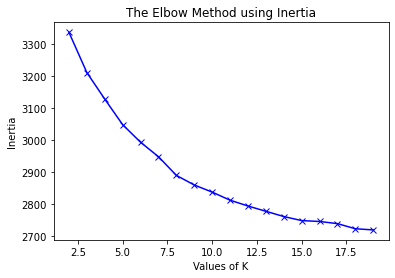

In [32]:
import matplotlib.pyplot as plt

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [33]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

2 : 0.935714373557357
3 : 0.91619836707375
4 : 0.9028714563666802
5 : 0.8898371568500096
6 : 0.8792571121246616
7 : 0.8722126369194547
8 : 0.861392185865993
9 : 0.8551025661517196
10 : 0.8517645840043736
11 : 0.8456531232813967
12 : 0.8435778902328284
13 : 0.8404453470936275
14 : 0.8361924874957982
15 : 0.8341222315661522
16 : 0.8361872928014998
17 : 0.8350219983163614
18 : 0.8303073307083287
19 : 0.8328561264163302


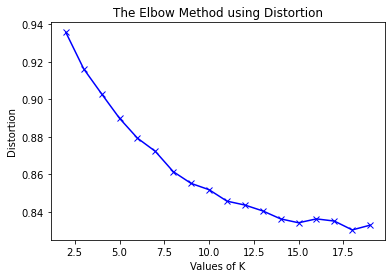

In [34]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()